## **INSTALL**


**Github**

https://github.com/sec-edgar/sec-edgar/tree/master

**Issue with direct pip install - install from git instead**

https://github.com/sec-edgar/sec-edgar/issues/266

**Documentation**

https://sec-edgar.github.io/sec-edgar/install.html

In [2]:
!pip install git+https://github.com/sec-edgar/sec-edgar.git

  Cloning https://github.com/sec-edgar/sec-edgar.git to /tmp/pip-req-build-a84_m6on
  Running command git clone --filter=blob:none --quiet https://github.com/sec-edgar/sec-edgar.git /tmp/pip-req-build-a84_m6on
  Resolved https://github.com/sec-edgar/sec-edgar.git to commit cdc4ea1a0444d8c4c8740c320732d1792c81aac2
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of aiohttp to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of aiohttp to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
  Installing build dependenci

## **GET - CIK Lookup**

This step also serves as a connection text

https://sec-edgar.github.io/sec-edgar/ciklookup.html

In [5]:
from secedgar.cik_lookup import CIKLookup

lookups = CIKLookup(['AAPL', 'MSFT', 'Facebook', 'WMT', 'Home Depot', 'HD'],
                     user_agent = "Alok (aloksik@gmail.com)")

lookups.lookup_dict

{'AAPL': '320193',
 'WMT': '104169',
 'MSFT': '789019',
 'Facebook': '0001326801',
 'HD': '354950',
 'Home Depot': '0000354950'}

## **GET - Company Filings**

https://sec-edgar.github.io/sec-edgar/filings.html#secedgar.CompanyFilings

In [6]:
from secedgar import FilingType, CompanyFilings
from datetime import date

ticker  = "HD"   # "WMT 2024-11-19"  # "AAPL"
filings = CompanyFilings(cik_lookup  = ticker,   # "WMT"  # "AAPL"
                         filing_type = FilingType.FILING_8K,     # FilingType.FILING_8K.value = 8-K
                         start_date  = date(2024, 11, 10),
                         end_date    = date(2024, 11, 15),
                         user_agent  = "Alok (aloksik@gmail.com)")  # Update user agent

# Print the filings (if any)
url_dict = filings.get_urls()
print(url_dict)

None
{'HD': ['https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/0000354950-24-000227.txt']}


/usr/local/lib/python3.10/dist-packages/secedgar/client.py:218: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  return BeautifulSoup(self.get_response(path, params, **kwargs).text,


#### **Extract base url for each filing**

In [7]:
import os

base_url_dict = {}
for url in url_dict[ticker]:

  # Extract the path
  path = os.path.dirname(url)

  # Print the path
  print("Extracted path:", path)

  # Save to dict
  base_url_dict[url] = path


Extracted path: https://www.sec.gov/Archives/edgar/data/354950/000035495024000227


In [8]:
# Print Base URLs for each Filing URL
base_url_dict

{'https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/0000354950-24-000227.txt': 'https://www.sec.gov/Archives/edgar/data/354950/000035495024000227'}

## **SAVE - FILINGS**

https://sec-edgar.github.io/sec-edgar/filings.html#saving-filings

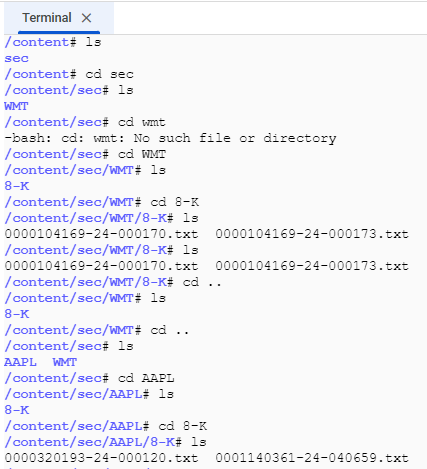

In [9]:
# https://stackoverflow.com/questions/46827007/runtimeerror-this-event-loop-is-already-running-in-python

import nest_asyncio
nest_asyncio.apply()
# EDIT: the __import__ line is not needed, leaving it just
# so that the comments make sense
# __import__('IPython').embed()


In [16]:
base_path = "./SEC/"
filings.save(base_path)

/usr/local/lib/python3.10/dist-packages/secedgar/client.py:218: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  return BeautifulSoup(self.get_response(path, params, **kwargs).text,


None


10it [00:01,  9.97it/s]


## **SAVE - PARSER OUTPUT**

**Github**  *`def process()`*

https://github.com/sec-edgar/sec-edgar/blob/master/secedgar/parser.py


**Documentation - basic**

https://sec-edgar.github.io/sec-edgar/parser.html#secedgar.parser.MetaParser

In [17]:
from secedgar import parser

file_path      = base_path + ticker + '/' + FilingType.FILING_8K.value + '/'
file_name      = '0000354950-24-000227.txt'   # WMT  '0000104169-24-000170.txt'
full_file_path = file_path + file_name

# instantiate object of MetaParser class
MetaParser_obj = parser.MetaParser()

# call process() method of the MetaParser class object, and save output to directory
MetaParser_obj.process(infile = full_file_path)

## **ADVANCED PARSING**

**Github**

https://github.com/sec-edgar/sec-edgar/blob/master/secedgar/parser.py


### **READ TXT FILE**

In [18]:
# Read the contents of the txt file
with open(full_file_path, 'r', encoding = 'utf-8') as file:
    file_content = file.read()


### **PRE-DEFINED REGEX PATTERNS**

In [19]:
# Regex patterns available
# https://github.com/sec-edgar/sec-edgar/blob/master/secedgar/parser.py

# type(MetaParser_obj.re_doc)
# re.Pattern

MetaParser_obj.re_doc                # re.compile("<DOCUMENT>(.*?)</DOCUMENT>", flags=re.DOTALL)
MetaParser_obj.re_sec_doc            # re.compile("<SEC-DOCUMENT>(.*?)</SEC-DOCUMENT>", flags=re.DOTALL)
MetaParser_obj.re_sec_header         # re.compile("<SEC-HEADER>.*?\n(.*?)</SEC-HEADER>", flags=re.DOTALL)
MetaParser_obj.re_text               # re.compile("<TEXT>(.*?)</TEXT>", flags=re.DOTALL)

re.compile(r'<TEXT>(.*?)</TEXT>', re.DOTALL|re.UNICODE)

### **DOC LIST**

In [20]:
# Use built-in re.Pattern to find all matches
doc_list = MetaParser_obj.re_doc.findall(file_content)

### **METADATA**

for each doc in the txt file:


*   *`def process_document_metadata()`*
*   *`def process_metadata()`*

In [21]:
# Extract Base URL for the TXT filing - for a specific file_name
for url in base_url_dict.keys():
  if url.endswith(file_name):
    base_url = base_url_dict[url]
    print(base_url)


https://www.sec.gov/Archives/edgar/data/354950/000035495024000227


In [22]:
# Print metadata for each doc in the doc_list

doc_master_dict = {}
for i, doc in enumerate(doc_list, start = 1):

    print(f"Document {i}:\n")

    doc_meta_dict                    = MetaParser_obj.process_document_metadata(doc)
    doc_master_dict['DOC_' + str(i)] = doc_meta_dict   # 'type', 'sequence', 'filename'
    print(doc_meta_dict)

    if doc_meta_dict['type'] not in ('GRAPHIC', 'EXCEL', 'ZIP'):
      try:
        meta_dict = MetaParser_obj.process_metadata(doc)
        print(meta_dict)

        # Update Master Dict with Doc 'description'
        doc_master_dict['DOC_' + str(i)].update(meta_dict)
      except:
        print('ERROR PROCESSING METADATA !')

    # Update Master Dict with Doc URL
    doc_url = base_url + '/' + doc_meta_dict['filename']
    doc_master_dict['DOC_' + str(i)].update({'doc_url': doc_url})

    # Print Doc URL + Separator
    print(doc_url)
    print("\n" + "="*90 + "\n")


Document 1:

{'type': '8-K', 'sequence': '1', 'filename': 'hd-20241112.htm'}
{'description': '8-K'}
https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/hd-20241112.htm


Document 2:

{'type': 'EX-99.1', 'sequence': '2', 'filename': 'hd_exhibit991x10272024.htm'}
{'description': 'EX-99.1'}
https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/hd_exhibit991x10272024.htm


Document 3:

{'type': 'EX-101.SCH', 'sequence': '3', 'filename': 'hd-20241112.xsd'}
{'description': 'XBRL TAXONOMY EXTENSION SCHEMA DOCUMENT'}
https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/hd-20241112.xsd


Document 4:

{'type': 'EX-101.LAB', 'sequence': '4', 'filename': 'hd-20241112_lab.xml'}
{'description': 'XBRL TAXONOMY EXTENSION LABEL LINKBASE DOCUMENT'}
https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/hd-20241112_lab.xml


Document 5:

{'type': 'EX-101.PRE', 'sequence': '5', 'filename': 'hd-20241112_pre.xml'}
{'description': 'XBRL TAXONOMY EXTENSION PRE

#### **Master Dict - metadata for all documents**

In [23]:
for k, v in doc_master_dict.items():
  print(k, v)

DOC_1 {'type': '8-K', 'sequence': '1', 'filename': 'hd-20241112.htm', 'description': '8-K', 'doc_url': 'https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/hd-20241112.htm'}
DOC_2 {'type': 'EX-99.1', 'sequence': '2', 'filename': 'hd_exhibit991x10272024.htm', 'description': 'EX-99.1', 'doc_url': 'https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/hd_exhibit991x10272024.htm'}
DOC_3 {'type': 'EX-101.SCH', 'sequence': '3', 'filename': 'hd-20241112.xsd', 'description': 'XBRL TAXONOMY EXTENSION SCHEMA DOCUMENT', 'doc_url': 'https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/hd-20241112.xsd'}
DOC_4 {'type': 'EX-101.LAB', 'sequence': '4', 'filename': 'hd-20241112_lab.xml', 'description': 'XBRL TAXONOMY EXTENSION LABEL LINKBASE DOCUMENT', 'doc_url': 'https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/hd-20241112_lab.xml'}
DOC_5 {'type': 'EX-101.PRE', 'sequence': '5', 'filename': 'hd-20241112_pre.xml', 'description': 'XBRL TAXONOMY EXTEN

### **SEC HEADER**

In [25]:
sec_header_list = MetaParser_obj.re_sec_header.findall(file_content)

for s in sec_header_list:
  print(s)

# ITEM INFORMATION:		Results of Operations and Financial Condition
# ITEM INFORMATION:		Financial Statements and Exhibits

<ACCEPTANCE-DATETIME>20241112061023
ACCESSION NUMBER:		0000354950-24-000227
CONFORMED SUBMISSION TYPE:	8-K
PUBLIC DOCUMENT COUNT:		15
CONFORMED PERIOD OF REPORT:	20241112
ITEM INFORMATION:		Results of Operations and Financial Condition
ITEM INFORMATION:		Financial Statements and Exhibits
FILED AS OF DATE:		20241112
DATE AS OF CHANGE:		20241112

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			HOME DEPOT, INC.
		CENTRAL INDEX KEY:			0000354950
		STANDARD INDUSTRIAL CLASSIFICATION:	RETAIL-LUMBER & OTHER BUILDING MATERIALS DEALERS [5211]
		ORGANIZATION NAME:           	07 Trade & Services
		IRS NUMBER:				953261426
		STATE OF INCORPORATION:			DE
		FISCAL YEAR END:			0202

	FILING VALUES:
		FORM TYPE:		8-K
		SEC ACT:		1934 Act
		SEC FILE NUMBER:	001-08207
		FILM NUMBER:		241442891

	BUSINESS ADDRESS:	
		STREET 1:		2455 PACES FERRY ROAD
		CITY:			ATLANTA
		STATE:			GA
		ZIP:			30339-4024
		BUSINESS PHONE:		770-433-8211

	MAIL ADDRESS:	
		STREET 1:		2455 PACES FERRY ROAD
		CITY:			ATLANTA

### **SEC DOC**

In [ ]:
# Don't run this for docs of this type
# https://www.sec.gov/Archives/edgar/data/104169/000010416924000170/0000104169-24-000170.txt
# CTRL+F: "SEC-DOCUMENT>"   (omit the opening angular blacket to match both section start and end)

# sec_doc_list = MetaParser_obj.re_sec_doc.findall(file_content)

### **TEXT**

#### **List of docs containing parsable text**

In [26]:
# Dictionary containing a list of texts for each doc in the doc_list
text_dict = {}
for i, doc in enumerate(doc_list, start = 1):

    doc_meta_dict = MetaParser_obj.process_document_metadata(doc)
    if doc_meta_dict['type'] not in ('GRAPHIC', 'EXCEL', 'ZIP'):
      try:
        text_list                  = MetaParser_obj.re_text.findall(doc)
        text_dict['DOC_' + str(i)] = text_list

        # Update Master Dict
        doc_master_dict['DOC_' + str(i)].update({'text_list': text_list})
      except:
        print(f'\nERROR PROCESSING TEXT for DOC {i}')

print(len(text_dict))

11


In [27]:
# Print the list of docs
text_dict.keys()

dict_keys(['DOC_1', 'DOC_2', 'DOC_3', 'DOC_4', 'DOC_5', 'DOC_7', 'DOC_9', 'DOC_10', 'DOC_11', 'DOC_12', 'DOC_14'])

#### **Text titles**

In [28]:
# Function to extract title(s) from text body
import re

def re_title(text, verbose = False):

  # Define the pattern (case-insensitive)
  pattern = re.compile(r"<Title>(.*?)</Title>", flags=re.IGNORECASE | re.DOTALL)

  # Use the pattern to find matches
  title_list = pattern.findall(text)

  # Print the extracted titles
  if verbose:
    for i, title in enumerate(title_list, start = 1):
        print(f"Title {i}: {title}")


In [29]:
# Print all Doc Names and Titles from text_dict
for doc_name, txt_list in text_dict.items():

  print(doc_name, type(txt_list), len(txt_list))
  for txt in txt_list:
    re_title(txt, verbose = True)


DOC_1 <class 'list'> 1
Title 1: hd-20241112
DOC_2 <class 'list'> 1
Title 1: Document
DOC_3 <class 'list'> 1
DOC_4 <class 'list'> 1
DOC_5 <class 'list'> 1
DOC_7 <class 'list'> 1
Title 1: 
DOC_9 <class 'list'> 1
DOC_10 <class 'list'> 1
DOC_11 <class 'list'> 1
DOC_12 <class 'list'> 1
DOC_14 <class 'list'> 1


#### **Print text contents for a specific doc**

In [30]:
print(text_dict['DOC_1'][0])


<XBRL>
<?xml version='1.0' encoding='ASCII'?>
<!--XBRL Document Created with the Workiva Platform-->
<!--Copyright 2024 Workiva-->
<!--r:41a76212-e127-4280-833f-91875d2f245a,g:fd813297-f6ac-4151-bff2-fb8609163c88,d:10d91034b74e46758ae771d46b4c9bf7-->
<html xmlns:ixt-sec="http://www.sec.gov/inlineXBRL/transformation/2015-08-31" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:ix="http://www.xbrl.org/2013/inlineXBRL" xmlns:dei="http://xbrl.sec.gov/dei/2023" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:link="http://www.xbrl.org/2003/linkbase" xmlns:xbrli="http://www.xbrl.org/2003/instance" xmlns="http://www.w3.org/1999/xhtml" xmlns:ixt="http://www.xbrl.org/inlineXBRL/transformation/2020-02-12" xml:lang="en-US"><head><meta http-equiv="Content-Type" content="text/html"/>


<title>hd-20241112</title></head><body><div style="display:none"><ix:header><ix:hidden><ix:nonNumeric contextRef="c-1" name="dei:AmendmentFlag" id="f-21">false</ix:nonNumeric><ix:nonNumeric contextRef="c-1

In [31]:
print(text_dict['DOC_2'][0])


<html><head>
<!-- Document created using Wdesk -->
<!-- Copyright 2024 Workiva -->
<title>Document</title></head><body><div id="i898fa7b642ab42dfaddb19f6eecafe0d_1"></div><div style="min-height:36pt;width:100%"><div><font><br></font></div></div><div style="text-align:right"><font style="color:#000000;font-family:'Arial',sans-serif;font-size:12pt;font-weight:700;line-height:120%">Exhibit 99.1</font></div><div><img alt="thdpms5prcntrulemediuma21.jpg" src="thdpms5prcntrulemediuma21.jpg" style="height:84px;margin-bottom:5pt;vertical-align:text-bottom;width:84px"></div><div style="text-align:center"><font><br></font></div><div style="text-align:center"><font style="color:#000000;font-family:'Arial',sans-serif;font-size:14pt;font-weight:700;line-height:120%">The Home Depot Announces Third Quarter Fiscal 2024 Results&#59;</font></div><div style="text-align:center"><font style="color:#000000;font-family:'Arial',sans-serif;font-size:14pt;font-weight:700;line-height:120%">Updates Fiscal 2024 Gu

### **TEXT PARSER**

In [35]:
import re
from html import unescape
from bs4 import BeautifulSoup

# PRINT DOC METADATA
DOC = 'DOC_2'
html_content = text_dict[DOC][0]
print(doc_master_dict[DOC]['description'])
print(doc_master_dict[DOC]['filename'])
print(doc_master_dict[DOC]['doc_url'])
print("=" * 150)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Initialize a list to store extracted sections with titles/comments
section_list = [ticker]

# ------------------ Parse All <DIV> and <FONT> Tags ------------------
for div in soup.find_all("div"):
    # Extract text content from nested <FONT> tags
    font_tags    = div.find_all("font")
    section_text = " ".join(unescape(font.get_text(strip=True)) for font in font_tags if font.get_text(strip=True))

    if section_text:  # Only include non-empty sections
      if section_list[-1] != section_text:  # Remove duplicates (usually consecutive entries)
        section_list.append(section_text)
        # print(section_text)


"""
# ------------------ Use Section Boundaries ------------------
sections = re.split(r"<HR noshade>|<!--.*?-->", str(soup), flags=re.DOTALL)
for section in sections:
    parsed_text = unescape(BeautifulSoup(section, "html.parser").get_text(strip=True))
    if parsed_text.strip():  # Only include non-empty sections
        sections_list.append({
            "title": None,
            "text": parsed_text
        })

        print(parsed_text)
        print("\n ========================================================== \n")
"""

# ------------------ Display Sections in Orginal Order ------------------
def display_sections(section_list):
    for i, section in enumerate(section_list, start = 1):
        print(f"\nSection {i}")
        print("\n" + section)
        print("=" * 90)

# Print sections in original order
display_sections(section_list)


EX-99.1
hd_exhibit991x10272024.htm
https://www.sec.gov/Archives/edgar/data/354950/000035495024000227/hd_exhibit991x10272024.htm

Section 1

HD

Section 2

Exhibit 99.1

Section 3

The Home Depot Announces Third Quarter Fiscal 2024 Results;

Section 4

Updates Fiscal 2024 Guidance

Section 5

ATLANTA, November 12, 2024 -- The Home Depot ® , the world's largest home improvement retailer, today reported sales of $40.2 billion for the third quarter of fiscal 2024, an increase of 6.6% from the third quarter of fiscal 2023. Comparable sales for the third quarter of fiscal 2024 decreased 1.3%, and comparable sales in the U.S. decreased 1.2%.

Section 6

Operating income for the third quarter of fiscal 2024 was $5.4 billion and operating margin was 13.5%, compared with operating income of $5.4 billion and an operating margin of 14.3% for the third quarter of fiscal 2023.

Section 7

Adjusted (1) operating income for the third quarter of fiscal 2024 was $5.6 billion and adjusted (1) operating m